# Interactive Geovisualization of Multimodal Freight Transport Network Criticality
Bramka Arga Jafino

Delft University of Technology

Faculty of Technology, Policy and Management

## An introduction note

This notebook provides an interactive tool to geospatially visualize the results of Bangladesh's multimodal freight transport network criticality. The interactivity doesn't work if you open this notebook from the Github page. Instead, in order to run the interactivity, you have to fork this notebook (as well as all the corresponding libraries and files used in this notebook) to your local computer, then run the jupyter notebook on it.

## 1. Import all required module and files

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpld3 import plugins, utils
import geopandas as gp
import pandas as pd
from shapely.wkt import loads

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

#Modules developed for this project
from transport_network_modeling import network_visualization as net_v

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets

In [2]:
#import criticality results
result_df_loc = r'./criticality_results/result_interdiction_1107noz2_v03.csv'
result_df = pd.read_csv(result_df_loc)

#import district shapefile for background
district_gdf_loc = r'./model_input_data/BGD_adm1.shp'
district_gdf = gp.read_file(district_gdf_loc)

In [3]:
#alter the 'geometry' string of the dataframe into geometry object
result_df['geometry'] = result_df['geometry'].apply(loads)

In [4]:
#create geodataframe from criticality results dataframe
crs = {'init': 'epsg:4326'}
result_gdf = gp.GeoDataFrame(result_df, crs=crs, geometry=result_df['geometry'])

In [5]:
#record all metrics in a list
all_metric = ['m1_01', 'm1_02', 'm2_01', 'm2_02', 'm3_01', 'm3_02', 'm4_01', 'm4_02', 'm5_01', 'm6_01',
             'm7_01', 'm7_02', 'm7_03', 'm8_01', 'm8_02', 'm8_03', 'm9_01', 'm10']

#create ranking columns for each metric
for metric in all_metric:
    result_gdf[metric + '_rank'] = result_gdf[metric].rank(ascending=False)

## 2. Interactive visualization

In [6]:
#create special colormap for the visualization
cmap = plt.get_cmap('YlOrRd')
new_cmap1 = net_v.truncate_colormap(cmap, 0.3, 1)
cmap = plt.get_cmap('Blues')
new_cmap2 = net_v.truncate_colormap(cmap, 0.3, 1)

There are three elements that can be adjusted in this interactive visualization: 
1. First, you can select the metric that results want to be displayed from the 'metric' dropdown list. 
2. Second, you can select the top n links with highest criticality score to be highlighted by adjusting the 'rank' slider. 
3. Third, you can select whether you want to also display Bangladesh's administrative boundary by turning on the 'show_division' toggle button.

The red links represent Bangladesh's road network while the blue links represent Bangladesh's waterway network.

100 top links are highlighted from metric m3_01 (Unweighted link betweenness centrality)


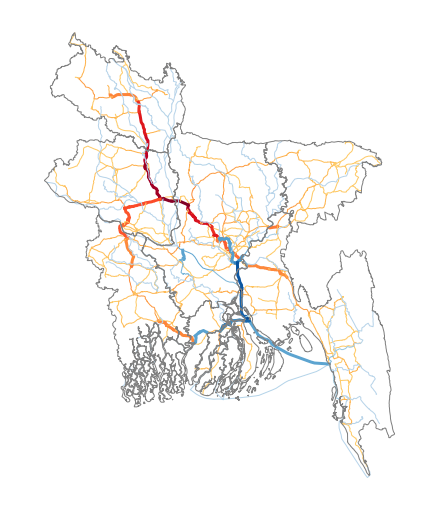

In [7]:
widgets.interact_manual(net_v.plot_interactive, rank=widgets.IntSlider(min=50, max=500, step=10, value=50),
                        metric=widgets.Dropdown(options=all_metric, value='m1_01'),
                        show_division=widgets.Checkbox(value=False), result_gdf=fixed(result_gdf),
                        cmaps=fixed([new_cmap1, new_cmap2]), district_gdf=fixed(district_gdf));